In [1]:
from __future__ import print_function, absolute_import, division

## Goal
Generating the following plots:

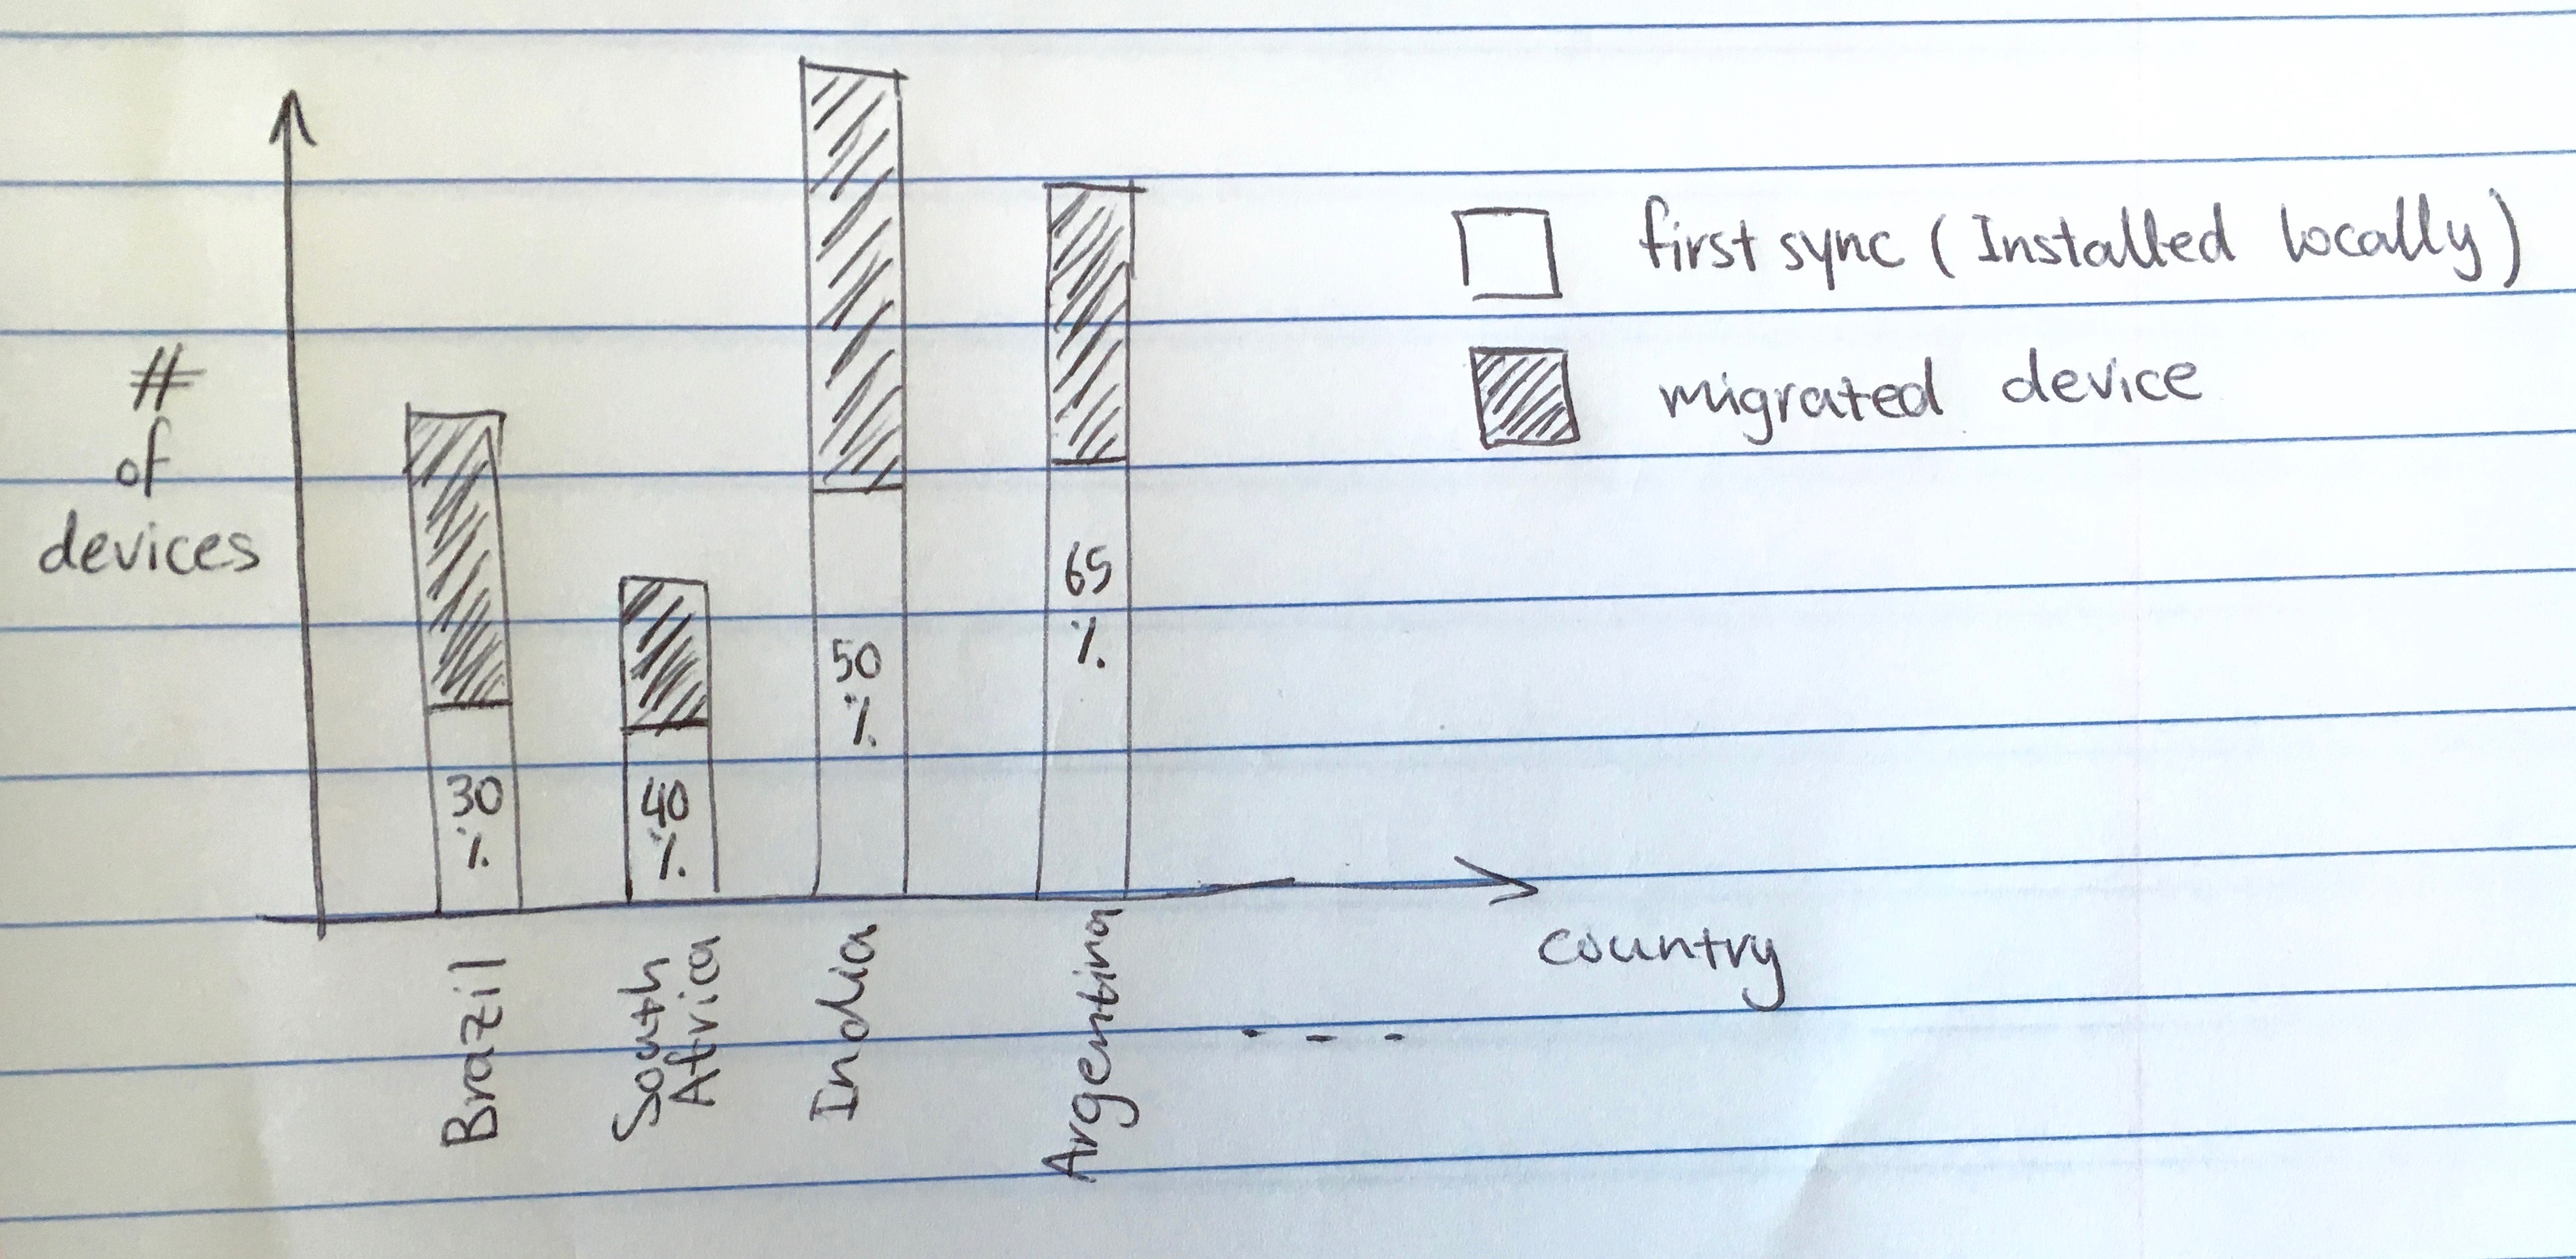

In [2]:
from IPython.display import Image
PATH = "/Users/sadeghia/Desktop/"
Image(filename = PATH + "counts_ratio.jpg", width=600, height=600)

In [3]:
import pymysql
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import pylab

/Users/sadeghia/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
%matplotlib inline

In [5]:
db = pymysql.connect(host='localhost', user='root',passwd='leproject',db='ka_lite_central')

In [6]:
cur = db.cursor()

In [7]:
q = """ SELECT * FROM securesync_country;"""
df_sql = pd.read_sql_query(q,db)

First I geberated a csv file running the following command. I don't need to run it every time.

In [8]:
# df_sql.to_csv('/Users/sadeghia/Desktop/insight/PROJECT/raw_securesync_countries.csv')

In [9]:
df = pd.read_csv("/Users/sadeghia/Desktop/insight/PROJECT/raw_securesync_countries.csv", index_col=0)
df.head()

,id,client_device_id,ip,countryname,timestamp
0,1,1f0e6b8810e85f56bedb1d616cd06fa6,196.25.30.237,ZA,2016-03-03 09:32:18
1,2,5042dd839d3a5fe5ab21978c3e2cc9bc,"95.50.255.202, 127.0.0.1",PL,2014-02-05 20:07:59
2,3,7db51d97291a57309c05eb77574224bb,96.53.23.10,CA,2016-04-25 06:28:39
3,4,913ee0fe8fee5719be0f76a679cd25d0,76.119.165.1,US,2016-05-27 03:13:44
4,5,79e9d792d97a506790ab47c80837ddc1,"24.84.110.212, 127.0.0.1",CA,2013-09-29 10:28:13


In [10]:
# to change dtype: object to dtype: datetime64[ns] for timestamp coulmn
df[['timestamp']] = df[['timestamp']].apply(pd.to_datetime)

In [11]:
df['year'] = df.timestamp.apply(lambda x: x.year)
df['month'] = df.timestamp.apply(lambda x: x.month)
#df.head(100)

## Create Client Table

In [12]:
uclients = sorted(df.client_device_id.unique())
print (len(uclients))
df_client = pd.DataFrame(index=uclients)
df_client['first_country'] = ''
df_client['last_country'] = ''
for i, client in enumerate(uclients):
#     print(i, client)
    thisclient = df[df.client_device_id == client]
    
#     print(thisclient.sort_values('timestamp').head())
    
    firsttime = thisclient[thisclient.timestamp == thisclient.timestamp.min()]
    df_client.loc[client, 'first_country'] = firsttime['countryname'].values[0]
    
    lasttime = thisclient[thisclient.timestamp == thisclient.timestamp.max()]
    df_client.loc[client, 'last_country'] = lasttime['countryname'].values[0]
    
#     df_client.loc[client, 'countries'] = thisclient['countryname']
    
    if (i%1000 == 0) and i > 0:
        print(i)
#     break

9059
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [13]:
df_client.head()

,first_country,last_country
0000dfd4eb1455c6aa90395c2f90210d,NG,NG
0002ef3eed89591b891744116bf335f1,US,US
000f66b804e9503e88a4ce846160cefa,SG,MM
001d7260da2f5c3ba56be59d09518a58,PH,PH
001fe66361105f0b9246464aa4173ac6,GH,GH


## Create Country Table

In [14]:
ucountries = sorted(df.countryname.dropna().unique())
df_country = pd.DataFrame(index=ucountries)

for i, country in enumerate(ucountries):
#    print(i, country)
    this_country = df[df.countryname == country]
  
   
    df_country.loc[country, 'n_2012'] = len(df[(df.countryname == country) & (df.year == 2012)].client_device_id.unique())
    
    df_country.loc[country, 'n_2013'] = len(df[(df.countryname == country) & (df.year == 2013)].client_device_id.unique())
    
    df_country.loc[country, 'n_2014'] = len(df[(df.countryname == country) & (df.year == 2014)].client_device_id.unique())
    
    df_country.loc[country, 'n_2015'] = len(df[(df.countryname == country) & (df.year == 2015)].client_device_id.unique())
   
    df_country.loc[country, 'n_2016'] = len(df[(df.countryname == country) & (df.year == 2016)].client_device_id.unique())
  

    # Get total number of clients
    clients = this_country.client_device_id.dropna()
    df_country.loc[country, 'n_uniq_clients'] = len(np.unique(clients))
    
    
    # get number of clients where country is first
    df_country.loc[country, 'n_first_clients'] = (df_client['first_country'] == country).sum()
              
    
# get the ratio of number of first clients to total number of clients
df_country['first_total_ratio'] = df_country['n_first_clients']/ df_country['n_uniq_clients']

df_country['n_immigr_clients'] = df_country['n_uniq_clients'] - df_country['n_first_clients']
    
df_country['immigr_total_ratio'] = df_country['n_immigr_clients'] / df_country['n_uniq_clients']    

In [15]:
df_country.head()

,n_2012,n_2013,n_2014,n_2015,n_2016,n_uniq_clients,n_first_clients,first_total_ratio,n_immigr_clients,immigr_total_ratio
AE,0.0,5.0,4.0,7.0,5.0,20.0,16.0,0.8,4.0,0.2
AF,0.0,0.0,1.0,2.0,3.0,6.0,6.0,1.0,0.0,0.0
AG,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
AL,0.0,0.0,1.0,2.0,0.0,3.0,3.0,1.0,0.0,0.0
AO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


#### I assigned the name of the countries using this website:

http://www.worldatlas.com/aatlas/ctycodes.htm

In [45]:
tmp = df_country[(df_country.n_uniq_clients > 50)]
df_country_50 =  tmp.rename(index={'AU': 'Australia',
                                   'BR':'Brazil','CA':'Canada',
                                   'CN':'China','DE':'Germany',
                                   'ES':'Spain',
                                   'FR':'France',
                                   'GB':'UK', 
                                   'GH':'Ghana',
                                   'GT':'Guatemala',
                                   'ID':'Indonesia',
                                   'IN':'India',
                                   'KE':'Kenya', 
                                   'MM':'Myanmar',
                                   'MX':'Mexico',
                                   'MY':'Malaysia',
                                   'NG':'Nigeria',
                                   'NL':'Netherlands',
                                   'PH':'Philippines', 
                                   'PK':'Pakistan',
                                   'PL':'Poland', 
                                   'SE':'Sweden',
                                   'SG':'Singapore',
                                   'TZ':'Tanzania',
                                   'US':'US',
                                   'XXXXX':'unknown',
                                   'ZA':'South Africa',
                                   'ZM':'Zambia'}).sort_values('immigr_total_ratio', ascending=0)
tmp.head(30)
df_country_50.head(30)
#print(len(df_country_50))
#df_country_50.head(30)

,n_2012,n_2013,n_2014,n_2015,n_2016,n_uniq_clients,n_first_clients,first_total_ratio,n_immigr_clients,immigr_total_ratio
unknown,2.0,1.0,1.0,45.0,65.0,111.0,65.0,0.585586,46.0,0.414414
Tanzania,0.0,3.0,21.0,23.0,20.0,58.0,41.0,0.706897,17.0,0.293103
Kenya,0.0,6.0,26.0,50.0,15.0,90.0,71.0,0.788889,19.0,0.211111
Malaysia,0.0,6.0,22.0,26.0,3.0,51.0,43.0,0.843137,8.0,0.156863
Germany,1.0,9.0,29.0,59.0,11.0,104.0,88.0,0.846154,16.0,0.153846
Singapore,0.0,10.0,17.0,43.0,7.0,76.0,66.0,0.868421,10.0,0.131579
Myanmar,0.0,12.0,30.0,20.0,8.0,61.0,53.0,0.868852,8.0,0.131148
UK,2.0,45.0,101.0,160.0,67.0,336.0,294.0,0.875000,42.0,0.125000
Sweden,1.0,9.0,18.0,20.0,7.0,51.0,45.0,0.882353,6.0,0.117647
France,0.0,2.0,37.0,54.0,17.0,98.0,87.0,0.887755,11.0,0.112245


In [17]:
# df_country_50 = df_country[(df_country.n_uniq_clients > 50) & (df_country.n_uniq_clients < 1000)].sort_values('immigr_total_ratio')
# df_country_50.head(10)

In [18]:
df_country_50.iterrows()
row = next(df_country_50.iterrows())[1]
row.name
#len(df_country_50)


'Australia'

In [19]:
np.random.rand(25)

array([ 0.35884954,  0.87672015,  0.83665467,  0.3364571 ,  0.88899893,
        0.93772129,  0.54895319,  0.56536909,  0.47593895,  0.57726923,
        0.57904738,  0.62247624,  0.64247247,  0.02112798,  0.18567143,
        0.02251526,  0.52086619,  0.03102746,  0.31027346,  0.10058553,
        0.89962108,  0.37055398,  0.76793104,  0.47645173,  0.65559526])

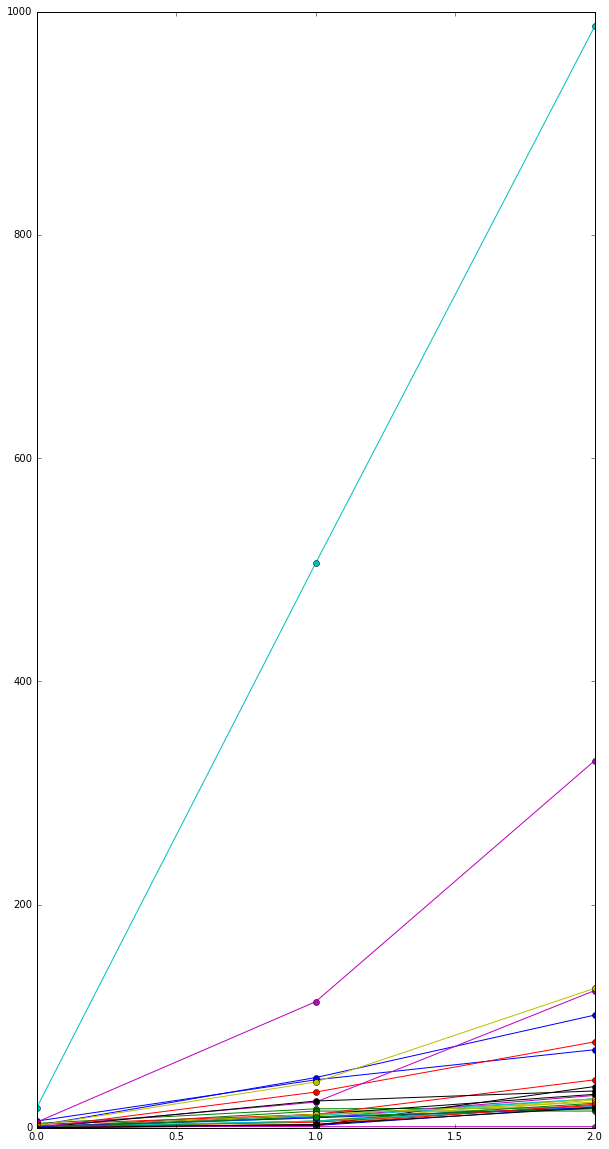

In [20]:
fig = plt.figure()
fig.set_size_inches(10,20)
colors = np.random.rand(25)
for i in range(len(df_country_50)):
    tmp = np.array(df_country_50.iloc[i])
    cn = row.name
    plt.plot(tmp[:3], marker='o')
    colors = np.random.rand(25)
    area = np.pi * (15 * np.random.rand(25))**2 
#    plt.scatter([2013,2014,2015], tmp[:3])
#    plt.scatter([2013,2014,2015], tmp[:3], alpha=0.5)
plt.show()

In [21]:
# tmp = df_country[df_country.n_uniq_clients > 50]
# sub = tmp[['n_2013','n_2014','n_2015']]
# sub.plot(kind="bar",stacked=True)

In [44]:
#tmp = df_country[df_country.n_uniq_clients > 50].sort_values('immigr_total_ratio')
tmp = df_country_50.sort_values('immigr_total_ratio', ascending=0)
sub = tmp[['n_first_clients','n_immigr_clients','n_uniq_clients', 'immigr_total_ratio']]
sub.head(30)

,n_first_clients,n_immigr_clients,n_uniq_clients,immigr_total_ratio
unknown,65.0,46.0,111.0,0.414414
Tanzania,41.0,17.0,58.0,0.293103
Kenya,71.0,19.0,90.0,0.211111
Malaysia,43.0,8.0,51.0,0.156863
Germany,88.0,16.0,104.0,0.153846
Singapore,66.0,10.0,76.0,0.131579
Myanmar,53.0,8.0,61.0,0.131148
UK,294.0,42.0,336.0,0.125000
Sweden,45.0,6.0,51.0,0.117647
France,87.0,11.0,98.0,0.112245


26


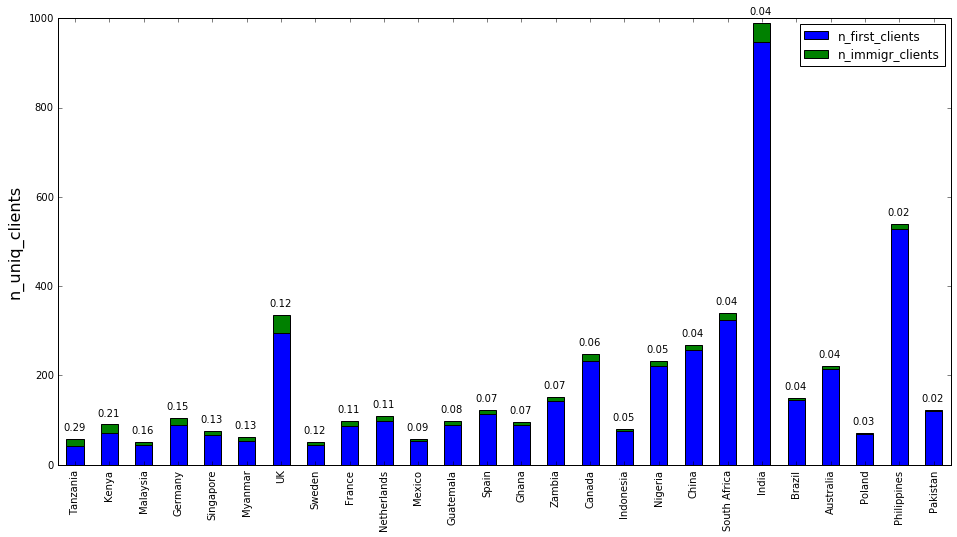

In [46]:
# with US:
#tmp0 = df_country_50[df_country_50.n_uniq_clients < 4000].sort_values('first_total_ratio')

# without US:
tmp0 = df_country_50[df_country_50.n_uniq_clients < 2000].sort_values('first_total_ratio')

tmp = tmp0.drop(['unknown'])
sub = tmp[['n_first_clients','n_immigr_clients']]
#fig = sub.plot(kind='bar', stacked=True, figsize=(16,8),logy=True)
fig = sub.plot(kind='bar', stacked=True, figsize=(16,8))
fig.set_ylabel("n_uniq_clients",  fontsize=16)
for i in range(len(tmp)):
    plt.text(i-.35,tmp['n_immigr_clients'][i]+tmp['n_first_clients'][i]+20,'{:0.2f}'.format(tmp['immigr_total_ratio'][i]))
tmp.head()
print(len(tmp))